<a href="https://colab.research.google.com/github/jazaineam1/Andes_ADDBD/blob/main/Cuadernos/Pyspark_y_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Spark intro 2***



## ***Universidad Central***
>## **Facultad de Ingeniería y Ciencias Básicas.**
>## ***Maestría en analítica de datos***
![Imágen1](https://www.ucentral.edu.co/themes/ucentral/img/template/Universidad%20Central.png)


>## ***Big Data.***
>## ***Docente: Antonino Zainea Maya.***

## Trabajando con RDD's
Un RDD (Resilient Distributed Dataset) es una estructura fundamental en Apache Spark que representa una colección de datos inmutable y distribuida. Aquí tienes una explicación más detallada de lo que es un RDD:

Resiliente: El término "resiliente" se refiere a la capacidad de los RDD para tolerar fallos. Los datos en un RDD se almacenan en múltiples nodos del clúster, lo que significa que si un nodo falla, los datos todavía pueden recuperarse de los nodos restantes. Esto asegura la disponibilidad y la recuperación de datos en caso de problemas.

Distribuido: Los RDD se dividen en particiones y se almacenan en varios nodos de un clúster de Spark. Esto permite el procesamiento paralelo de datos en el clúster, lo que lleva a un alto rendimiento en el procesamiento de grandes conjuntos de datos.

Dataset: Un RDD es, en esencia, una colección de datos. Estos datos pueden ser de cualquier tipo, como números, texto, objetos complejos, etc. Spark proporciona funciones para realizar operaciones de transformación y acción en estos datos.

Inmutable: Los RDD son inmutables, lo que significa que una vez que se crea un RDD, no se pueden modificar sus datos. En cambio, puedes realizar transformaciones en un RDD para crear uno nuevo con los cambios deseados.

Transformaciones y Acciones: Los RDD admiten dos tipos principales de operaciones: transformaciones y acciones. Las transformaciones crean un nuevo RDD a partir de uno existente (por ejemplo, mapeo, filtrado o reducción), mientras que las acciones realizan cálculos en los datos y devuelven resultados (por ejemplo, contar, recopilar o guardar en disco).

 En Spark, todo el trabajo se expresa ya sea creando nuevos RDD, transformando RDD existentes o llamando a operaciones en RDD para calcular un resultado. Bajo el capó, Spark distribuye automáticamente los datos contenidos en los RDD en su clúster y paraleliza las operaciones que realiza en ellos. __Los RDD son el concepto central en Spark__.
<br />
<br />
Si bien en las últimas versiones de Spark (mediados de 2019) el RDD como estructura de manipulación de datos pierde protagonismo, las estructuras nuevas que son utilizadas como los DataFrames y los DataSets son en realidad abstracciones de estos RDD que siguen estando en el núcleo de Spark.
<br />
<br />

### Creación de RDD
Cada RDD se divide en varias particiones, que se pueden calcular en diferentes nodos del clúster. Los RDD pueden contener cualquier tipo de objetos Python, Java o Scala, incluidas las clases definidas por el usuario.

Es posbile crear RDD de dos maneras: cargando un conjunto de datos externo o distribuyendo una colección de objetos (por ejemplo, una lista o conjunto).

**Crear un RDD**

In [4]:
!pip install pyspark

In [5]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()# versiones anteriores a spark 2 solo RDDs
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [6]:
dias=['lunes','martes','jueves']
diasRdd=sc.parallelize(dias)
type(diasRdd)

pyspark.rdd.RDD

In [7]:
diasRdd.getNumPartitions()# indica el número de particiones

2

In [8]:
#podemos indicar el número de particiones a tener en cuenta
diasRdd=sc.parallelize(dias,4)
diasRdd.getNumPartitions()

4

In [9]:
!wget https://raw.githubusercontent.com/jazaineam1/BigDataMINE2023/main/data/Pyspark/mr_text-file.txt
!hdfs dfs -put -f mr_text-file.txt /user/root/mr_text-file.txt

--2024-05-09 22:49:38--  https://raw.githubusercontent.com/jazaineam1/BigDataMINE2023/main/data/Pyspark/mr_text-file.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1548 (1.5K) [text/plain]
Saving to: ‘mr_text-file.txt’

mr_text-file.txt    100%[===================>]   1.51K  --.-KB/s    in 0s      

2024-05-09 22:49:38 (24.3 MB/s) - ‘mr_text-file.txt’ saved [1548/1548]

/bin/bash: line 1: hdfs: command not found


In [10]:
text_file = sc.textFile("mr_text-file.txt")
text_file

mr_text-file.txt MapPartitionsRDD[3] at textFile at NativeMethodAccessorImpl.java:0

In [11]:
text_file.collect()

['Ye-eh, eh-eh-eh',
 'Ye-eh, eh-eh-eh',
 'Ye-eh',
 '(ATL Jacob) (ATL Jacob)',
 'Te busco y no sé dónde estás',
 'Estoy buscando respuestas',
 '¿Cuándo fue la última vez que te vi sonreír?',
 'Te decía: "mi reina"',
 'Te temblaban las piernas',
 'Contigo las noches no, no eran pa dormir',
 'A veces lo ignoro',
 'Fumo y bebo solo',
 'Siempre pensé que no te debiste ir',
 'Cambiaste plata por oro',
 'Eras mi tesoro',
 'No supe qué día te olvidaste de mí',
 'Y-y de mí',
 'Y-y, yo de ti',
 'No supe que día te olvidaste de mí',
 'Y-y, de mí',
 'Y-y, yo de ti',
 'No supe que día te olvidaste de mí',
 'Y-y, de mí',
 'Y-y, de mí',
 'No supe qué día te olvidaste de mí',
 'Y-y, de mí',
 'Y-y, yo de ti',
 'Yeh-yeh',
 "A veces te extraño, ma'",
 'Te quiero perdonar',
 'Pero me tiraste pa la lona',
 'Me dejaste en cero toda la estamina',
 'No me llames cuando te sientas sola',
 'Bebé, yo sé que también extrañas los carros',
 'Hacer el amor cuando estábamos farros, yeh',
 'Todo era mentira cuando tú 

Una vez creados, los RDD ofrecen dos tipos de operaciones:
- Las __transformaciones__ construyen un nuevo RDD a partir de uno anterior.
- Las __acciones__, por otro lado, calculan un resultado basado en un RDD y lo devuelven al programa del controlador o lo guardan en un sistema de almacenamiento externo (por ejemplo, HDFS).

Las transformaciones y las acciones son diferentes debido a la forma en que Spark calcula los RDD. Aunque puede definir nuevos RDD en cualquier momento, Spark solo los computa de forma diferida, es decir, la primera vez que se utilizan en una acción. Este enfoque puede parecer inusual al principio, pero tiene mucho sentido cuando se trabaja con Big Data. Si Spark cargara y almacenara todas las líneas en el archivo tan pronto como escribiéramos _text_file = sc.textFile(...)_, desperdiciaría mucho espacio de almacenamiento o tiempo de procesamiento, dado que luego podemos filtrar  muchas líneas. En cambio, una vez que Spark ve la cadena completa de transformaciones, puede calcular solo los datos necesarios para su resultado.

### Transformaciones en Spark

A continuación se define un listado de las transformaciones más comunes:
<br />-Para la columna __Result__ se calcula con un RDD con los valores {1, 2, 3, 3} en las operaciones unarias (map, flatMap, filter, distinct, sample) y para las binarias rdd={1, 2, 3} y other={3, 4, 5}.-

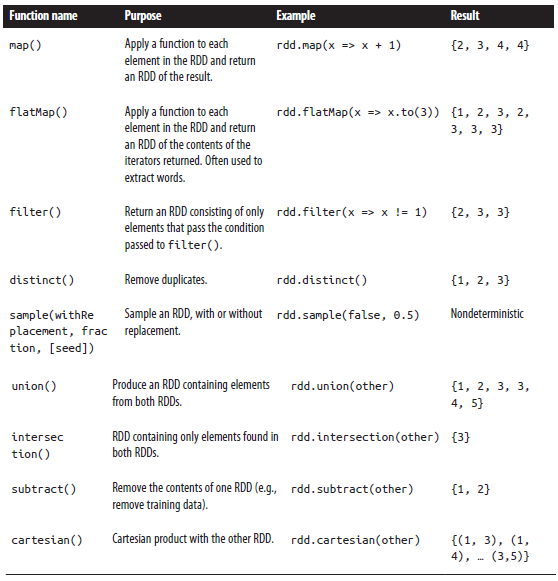



**map**

In [12]:
diasM=diasRdd.map(lambda x: x.upper())#.collect()
print(type(diasM))
diasM.collect()

<class 'pyspark.rdd.PipelinedRDD'>


['LUNES', 'MARTES', 'JUEVES']

**flatMap**

In [13]:
rdd = sc.parallelize([2, 3, 4])
rdd.flatMap(lambda x: (x,x*x)).collect()

[2, 4, 3, 9, 4, 16]

**filter**

In [14]:
 diasRdd.filter(lambda x: x.startswith('l')).collect()

['lunes']

**distinct**

In [15]:
len(text_file.collect())

59

In [16]:
len(text_file.distinct().collect())

33

**sample(withReplacement, fraction, seed):**
Muestrea una fracción de los datos, con o sin reemplazo, usando una semilla generadora de números aleatorios

In [17]:
rdd = sc.parallelize(range(100))
sample= rdd.sample(False, 0.2, 1)
sample.collect()

[9, 11, 13, 30, 41, 64, 74, 79, 85, 91, 95]

**union(otherDataset):** Entrega un nuevo conjunto de datos que incluye los datos actuales y los que se pasen como argumento


In [18]:
a=sc.parallelize([1, 3, 5, 7, 9])
b=sc.parallelize([0, 2, 4, 6, 8])
a.union(b).collect()


[1, 3, 5, 7, 9, 0, 2, 4, 6, 8]

**intersection(otherDataset):** Entrega un nuevo conjunto de datos formado por la intersección entre el conjunto de datos actual y el que se pasa como argumento

In [19]:
a=sc.parallelize([0, 2, 4, 6, 8])
b=sc.parallelize([6, 8, 10, 12, 14])
a.intersection(b).collect()

[8, 6]


### Acciones en Spark

A continuación se define un listado de las acciones más comunes y su utilización:
<br />-Para la columna __Result__ se calcula con un RDD con los valores {1, 2, 3, 3}.-



| Acción      | Descripción                                    |
|-------------|------------------------------------------------|
| .first(3)   | obtener los primeros 3 elementos               |
| .count()    | contar los elementos en el RDD                 |
| .take(3)    | obtener los primeros 3 elementos (similar a .first(3)) |
| .collect()  | generar una lista a partir del RDD             |
| .sum()      | sumar los elementos del RDD                    |
| .mean()     | calcular el promedio de los elementos del RDD  |
| .stdev()    | calcular la desviación estándar de los elementos del RDD |

  
**reduce(func):** Agrega los elementos de un conjunto de datos aplicando sobre ellos una función


In [20]:

from operator import add
rdd=sc.parallelize([1, 2, 3, 4, 5])
rdd.reduce(add)

15

**Collect()**: Devuelve todos los elementos del conjunto de datos

**count()**: Entrega el número de elementos disponibles en el conjunto de datos


In [21]:
sc.parallelize([1, 2, 3, 4, 5]).count()

5

**First():** Entrega el primer elemento del conjunto de datos

In [22]:
sc.parallelize([1, 2, 3, 4, 5]).first()

1

**Take(n):** Entrega los primeros n elementos del conjunto de datos


In [23]:
sc.parallelize([1, 2, 3, 4, 5]).take(3)

[1, 2, 3]

**TakeOrdered(n):** Entrega los primeros n elementos del conjunto de datos ordenados


In [24]:
sc.parallelize([5, 3, 1, 4, 2]).takeOrdered(3)

[1, 2, 3]


**countByKey():** Devuelve un conjunto de datos representado por tuplas clave, valor. Donde el valor entregado será la suma de los elementos de la misma clave


In [25]:
rdd = sc.parallelize([("a", 1), ("b", 1), ("a", 2), ("b", 6), ("a", 3), ("c", 5)])
rdd.countByKey()

defaultdict(int, {'a': 3, 'b': 2, 'c': 1})

### Persistencia
La persistencia (o caching) en RDD de PySpark es una característica importante que permite a los usuarios almacenar temporalmente los RDDs en la memoria (RAM) o en el disco del cluster de Spark. Esto puede ser extremadamente útil para mejorar el rendimiento de tu aplicación de Spark, especialmente si necesitas acceder múltiples veces a un mismo RDD en distintas acciones.

### ¿Por qué es importante la Persistencia?

Apache Spark utiliza un modelo de computación basado en transformaciones lazy (perezosas), lo que significa que las transformaciones aplicadas a los RDDs (como `map`, `filter`, `reduceByKey`, etc.) no se ejecutan inmediatamente. En cambio, Spark construye un DAG (directed acyclic graph, grafo acíclico dirigido) de todas las transformaciones que necesitan ser aplicadas y solo cuando se solicita una acción (como `collect`, `count`, `save`, etc.), Spark ejecuta todas las transformaciones necesarias.

Sin la persistencia, cada vez que ejecutes una acción sobre un RDD, Spark volverá a calcular todo el RDD desde el principio junto con todas las transformaciones que llevó a este. Esto puede ser muy ineficiente, especialmente si algunas partes de tu dataset son usadas repetidamente.

### Niveles de Persistencia

PySpark proporciona varios niveles de persistencia para los RDDs:

- `MEMORY_ONLY`: Almacena el RDD como objetos Java deserializados en la JVM. Si el RDD no cabe en la memoria, algunas particiones no se cachearán y serán recomputadas en cada acción, según sea necesario. Este es el nivel por defecto.
- `MEMORY_AND_DISK`: Almacena el RDD en la memoria como objetos Java deserializados. Si el RDD no cabe en memoria, las particiones que no caben se almacenan en disco y se leen de allí según sea necesario.
- `DISK_ONLY`: Almacena el RDD completo en el sistema de archivos local del nodo.


### Uso de la Persistencia

Para persistir un RDD en PySpark, puedes usar el método `persist()` o `cache()`. `cache()` es un alias para `persist()` con el nivel de almacenamiento por defecto (`MEMORY_ONLY`). Si quieres especificar un nivel de persistencia diferente, puedes usar `persist()` con uno de los niveles de almacenamiento mencionados:


In [26]:
# Crea un RDD con números del 1 al 100
rdd = sc.parallelize(range(1, 101))

# Filtra los números pares
rdd_pares = rdd.filter(lambda x: x % 2 == 0)

# Persiste el RDD en memoria
rdd_pares.persist()

# Cuenta la cantidad de números pares
conteo_pares = rdd_pares.count()
print("Cantidad de números pares:", conteo_pares)

# Realiza alguna operación adicional con el RDD persistido
suma_pares = rdd_pares.reduce(lambda x, y: x + y)
print("Suma de los números pares:", suma_pares)

Cantidad de números pares: 50
Suma de los números pares: 2550


In [27]:
rdd_pares.unpersist()


PythonRDD[42] at RDD at PythonRDD.scala:53

In [28]:
counts = text_file.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)
top = counts.sortBy(lambda v: -v[1]).take(10)
for p in top:
	print (p[0] + ": %d" % p[1])

de: 26
mí: 19
te: 15
Y-y,: 15
que: 12
No: 10
supe: 9
día: 9
olvidaste: 9
yo: 8


In [29]:
counts = text_file.flatMap(lambda line: line.replace(",","").split(" ")) \
      .filter(lambda x: x != '') \
      .map(lambda x: x.lower()) \
      .map(lambda word: (word, 1)) \
      .reduceByKey(lambda a, b: a + b)

top = counts.sortBy(lambda v: -v[1]).take(10)

for p in top:
	print (p[0] + ": %d" % p[1])

de: 26
te: 22
mí: 19
y-y: 16
no: 15
que: 12
supe: 9
día: 9
olvidaste: 9
yo: 8


In [30]:
sc.stop()

## Reto

Usando la información cargada en https://raw.githubusercontent.com/jazaineam1/BigData2023_2/main/Datos/datos_icfes.csv y usando cargando RDD's  indique.

1. top 5 de los departamentos que más registros de examens icfes tienen
2. Promedio de puntaje global por departamento.
3. top 5 de los departamentos con peores puntajes

#**DATA FRAME**
Se puede definir como una colección de datos distribuidos organizada por columnas y optimizada para para operar en clústers de Spark

Es un concepto similar a las tablas en las bases de datos relacionales solo que presentan características similares a los RDDs

En los Data Frames se puede acceder a los datos utilizando la librería SQL de Spark a través del SQLContext que se obtiene desde el SparkContext


In [ ]:
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("yarn").getOrCreate()
sc = SparkContext.getOrCreate()
sqlCtx = SQLContext(sc)

**Crear un Data Frame**

Existen dos formas de crear un Data Frame

1. Desde un RDD: Crear un RDD y usar el método createDataFrame para obtener un Data Frame a partir del RDD

In [ ]:
datos=[(1,"Juan",33,"Masculino","Ingeniero",4500000),\
       (2,"Ana",38,"Femenino","Arquitecta",6200000),\
       (3,"Carmen",52,"Femenino","Abogada",7500000)]
empleadosRDD=sc.parallelize(datos)
empleadosRDD.collect()
type(empleadosRDD)

In [ ]:
empleadosDF=sqlCtx.createDataFrame(empleadosRDD)
empleadosDF.collect()
type(empleadosDF)

Los Data Frame tiene algunos métodos que facilitan la operación y visualización de los datos

In [ ]:
empleadosDF.show()

Para comprender mejor los datos podemos indicar el nombre de las columnas

In [ ]:
empleadosDF=sqlCtx.createDataFrame(empleadosRDD,["Id","Nombre","Edad","Sexo","Profesión","Salario"])
empleadosDF.collect()
empleadosDF.show()

Veamos qué tipo de dato se adoptó parma cada variable

In [ ]:
empleadosDF.printSchema()



En el siguiente link puede consultar los diferentes tipos de datos disponibles


http://spark.apache.org/docs/3.0.0-preview2/sql-ref-datatypes.html

La Edad y el salario los estamos usando con el mismo tipo de dato, pero en realidad podríamos optimizar si modificamos el tipo de dato de la edad


In [ ]:
from pyspark.sql.types import *
empleadosDF=sqlCtx.createDataFrame(empleadosRDD, \
          StructType([ \
                      StructField("Id", ByteType(),False), \
                      StructField("Nombre", StringType(),False), \
                      StructField("Edad", ByteType(),False), \
                      StructField("Sexo", StringType(),False), \
                      StructField("Profesión", StringType(),False), \
                      StructField("Salario", IntegerType(),False)]))
empleadosDF.printSchema()
empleadosDF.show()

2. Crear Data Frame desde un archivo externo

**Cargar archivo csv**

In [ ]:
!wget https://raw.githubusercontent.com/jazaineam1/BigDataMINE2023/main/data/Pyspark/empleados.csv
!hdfs dfs -put  empleados.csv /user/root/

!wget https://raw.githubusercontent.com/jazaineam1/BigDataMINE2023/main/data/Pyspark/titanic.csv
!hdfs dfs -put  titanic.csv /user/root/

!wget https://raw.githubusercontent.com/jazaineam1/BigDataMINE2023/main/data/Pyspark/empleados.json
!hdfs dfs -put  empleados.json /user/root/

In [ ]:
empleadosDF = sqlCtx.read.csv("empleados.csv")
print(type(empleadosDF))
empleadosDF.show(5)

Creo el Data Frame correctamente pero no le hemos indicado que la primera línea es el header

In [ ]:
empleadosDF = sqlCtx.read.option("header",True) \
     .csv("empleados.csv")
empleadosDF.show(5)

Veamos el formato asumido para cada variable

In [ ]:
empleadosDF.printSchema()

Qué tal si asignamos el tipo de datos de cada variable

In [ ]:
schema = StructType() \
      .add("Id",ByteType(),True) \
      .add("Nombre",StringType(),True) \
      .add("Edad",ByteType(),True) \
      .add("Sexo",StringType(),True) \
      .add("Profesión",StringType(),True) \
      .add("Salario",IntegerType(),True)

empleadosDF = sqlCtx.read.format("csv") \
      .option("header", True) \
      .option("delimiter", ",") \
      .schema(schema) \
      .load("empleados.csv")
empleadosDF.printSchema()
empleadosDF.show()

**Cargar archivo json**

In [ ]:
empleadosDF = sqlCtx.read.json("empleados.json")
type(empleadosDF)
empleadosDF.printSchema()
empleadosDF.show()
empleadosDF = sqlCtx.read.json("empleados.json", \
            StructType([ \
                      StructField("Id", IntegerType(),False), \
                      StructField("Nombre", StringType(),False), \
                      StructField("Edad", ByteType(),False), \
                      StructField("Sexo", StringType(),False), \
                      StructField("Profesión", StringType(),False), \
                      StructField("Salario", IntegerType(),False)]))
type(empleadosDF)
empleadosDF.printSchema()
empleadosDF.show()

**Acceso a los datos**

Una gran ventaja que ofrecen los Data Frames es que podemos acceder a cada variable a través del nombre del data frame, el caracter punto(.) y el nombre de la variable


In [ ]:

empleadosDF.Salario


##**Operaciones**
Sobre los Data Frames podemos realizar varios tipos de operaciones.

Vamos dos de ellas, a saber, propiedades y métodos
###**Propiedades**

Las propiedades son atributos que podemos consultar sobre nuestros Data Frames.

Veamos algunas de ellas
**columns**

Es una propiedad que se utiliza para conocer el nombre de las variables (columnas) del Data Frame


In [ ]:
empleadosDF.columns


**dtypes**

Atributo que indica el tipo de dato de cada variable (columna) del Data Frame

In [ ]:

empleadosDF.dtypes


**rdd**

Convierte un Data Frame a un RDD

In [ ]:

empRDD=empleadosDF.rdd
type(empRDD)



### **Métodos**
Data Frame dispone de una serie de métodos que podemos aplicar sobre nuestros datos. Algunos de estos son similares a los métodos revisados para RDD.

Veamos algunos de los principales métodos disponibles en Data Frames
**agg(funciones_agregacion)**

Este método realiza una agregación sobre el data frame, es decir que a partir del data frame original, devuelve un nuevo data frame que contiene el resultado de las funciones de agregación realizadas sobre el conjunto de datos.

Estas funciones de agregación son especificadas por el usuario y hacen referencia a operaciones básicas sobre los datos. Estas son algunas de las funciones de agregación disponibles:

* first: entrega el primer elemento
* last: entrega el último elemento
* min: entrega el valor mínimo de una variable específica
* max: entrega el valor máximo de una variable específica
* sum: entrega la suma de los valores de una variable específica
* avg: entrega el promedio de los valores de una variable específica
Usemos el método agg para conocer el promedio de los salarios de los empleados

---


In [ ]:
empleadosDF.show()
salario=empleadosDF.agg({"Salario": "avg"}).take(1)
type(salario)
salario

In [ ]:
salario=empleadosDF.agg({"Salario": "avg"})
salario.show()
type(salario)


También podemos utilizar las funciones disponibles en la clase functions de la librería pyspark.sql

In [ ]:
from pyspark.sql import functions
edad=empleadosDF.agg( \
    functions.min(empleadosDF.Edad), \
    functions.max(empleadosDF.Edad), \
    functions.avg(empleadosDF.Edad))
edad.show()
type(edad)

En este caso utilizamos tres funciones de agregación, el resultado es un nuevo Data Frame de una sola fila y tres columnas (una por cada función de agregación)

**corr(var1,var2)**
Este método se utiliza para calcular la correlación entre un par de variables del Data Frame

In [ ]:
empleadosDF.corr("Edad", "Salario")

**count()**

Se utiliza para conocer el número de registros (filas) en el Data Frame

In [ ]:

empleadosDF.count()


**distinct()**

Crea un nuevo Data Frame a partir de los registros (filas) que sean diferentes en el Data Frame inicial

In [ ]:
emp=empleadosDF.distinct()
emp.show()


**drop(var)**

Toma el Data Frame inicial, elimina la variable (columna) especificada y entrega un nuevo Data Frame con el resultado


In [ ]:
emp=empleadosDF.drop("Id")
emp.show()

**union(other)**

Este método crea un nuevo Data Frame a partir de la unión de dos Data Frames

In [ ]:
nuevos=sqlCtx.createDataFrame([ \
      (4,"Ana",40,"Femenino","Docente",7600000), \
      (5,"Luis",62,"Masculino","Panadero",None)])
nuevos.show()
emp=empleadosDF.union(nuevos)
emp.show()

**dropDuplicates(var)**
Este método devuelve un nuevo Data Frame en el que ha eliminado los registros (filas) duplicadas. Esto ya los hacía el método distinct(), la diferencia es que en dropDuplicates() se puede especificar las columnas a evaluar para considerar que dos registros son duplicados


In [ ]:
empd=emp.dropDuplicates()
empd.show()

**fillna(valor,col[ ])**

Este método devuelve un nuevo Data Frame luego de sustituir los valores nulos detectados por el valor especificado.

Adicionalmente, es posible indicarlo cuales son las columnas sobre las que va a operar


In [ ]:
empfna=empd.fillna(1000000)
empfna.show()


**dropna(_cuantas, _umbral, _columnas)**

Este método devuelve un nuevo Dat Frame resultado de eliminar los registros (filas) que contienen nulos en el Data Frame inicial.



In [ ]:

empd.show()
empdna=empd.dropna("any")
empdna.show()


**filter(condicion)**
Funciona similar al filter de RDD. Devuelve un nuevo Data Frame que contiene los registros para los cuales la condición arroja como resultado True



In [ ]:
empf=empleadosDF.filter(empleadosDF.Salario>5000000)
empleadosDF.show()
empf.show()

**GroupBy(var)**

Genera un nuevo Data Frame donde agrupa los registros que coincidan en la variable especificada.

Luego de agrupar es posible realizar agregaciones para indicar que se desea realizar con los valores de los registros agrupados


In [ ]:

empavg=emp.groupBy("Nombre").avg()
empsal=emp.groupBy("Nombre").agg({"Salario":"avg"})
print("Data Frame Inicial")
emp.show()
print("Data Frame promediando todas las variables")
empavg.show()
print("Data Frame promediando una variable específica")
empsal.show()


**orderBy(var)**

Entrega un Data Frame ordenado de acuerdo a la variable indicada

In [ ]:


empo=emp.orderBy(emp.Salario.desc())
print("Data Frame Inicial")
emp.show()
print("Data Frame ordebado por salario")
empo.show()


**select(lista_var)**

Genera un nuevo Data Frame que incluye únicamente las variables indicadas del Data Frame original

In [ ]:
emps=empleadosDF.select("Nombre","Sexo","Salario")
print("Data Frame Inicial")
empleadosDF.show()
print("Data Frame nuevo")
emps.show()

**selectExpr(expresiones)**

Funciona similar al método select(), pero permite crear nuevas variables (columnas) a partir de la evaluación de las expresiones indicadas

In [ ]:
emps=empleadosDF.selectExpr("Nombre","Sexo","Salario", "Edad > 50")
print("Data Frame Inicial")
empleadosDF.show()
print("Data Frame nuevo")
emps.show()


**withcolumn(nombre,expresion)**

Al igual que selectExpr() permite adicionar columnas con el resultado de la evaluación de una expresión. La diferencia consiste en poder asignar el nombre de las columnas adicionadas


In [ ]:
emps=empleadosDF.withColumn("Mayor de 50", empleadosDF.Edad > 50)
print("Data Frame Inicial")
empleadosDF.show()
print("Data Frame nuevo")
emps.show()


## **Consultas SQL**
Los métodos descritos anteriormente permiten operar los datos para crear registros, leerlos, actualizarlos e incluso eliminarlos, las operaciones básicas de un CRUD.

Seguramente usted está acostumbrado a realizar estas operaciones utilizando lenguaje SQL, pues bien, la clase SqlContext de Spark cuenta con un método llamado sql que permite utilizar el lenguaje SQL para operar un Data Frame

Para poder hacer esto, debe registrar en el motor de SQL una tabla que servirá para referenciar el Data Frame y realizar las operaciones sobre dicha tabla

De esta manera cada que requiere utilizar una consulta SQL lo realizará sobre la tabla Empleados

**Lectura de datos**

In [ ]:
empleadosDF.registerTempTable("Empleados")

In [ ]:

q1 = sqlCtx.sql("SELECT * FROM Empleados")
q1.show()

**Filtremos los registros que la edad sea mayor que 50**

In [ ]:
q2 = sqlCtx.sql('SELECT * FROM Empleados WHERE Edad > 50')
q2.show()

**Leamos solo las variables de interés**

In [ ]:
q3 = sqlCtx.sql("""
		SELECT Nombre, Edad, Sexo
		FROM Empleados
	""")
q3.show()

**Funciones definidas por el usuario**

A demás de las consultas básicas que proporciona SQL, el usuario puede definir sus propias funciones e incorporarlas dentro de una consulta SQL. Esto es de gran ayuda para personalizar las acciones que deseamos realizar sobre los datos

Primero debemos definir la función a utilizar

In [ ]:

def funcionEdad(edad):
	if edad < 50:
		return "Menor de 50"
	else:
		return "Mayor de 50"


Ahora debmemos registrar la función con la ayuda del SqlContext

In [ ]:
sqlCtx.registerFunction("funcionEdad",funcionEdad)


In [ ]:
q4 = sqlCtx.sql("""
		SELECT Nombre, Sexo, Salario, funcionEdad(Edad) AS Edad_Mayor_50
		FROM Empleados
		""")
q4.show()

#**Ejemplos**

##**Titanic**
El archivo titanic.csv recoge la información de los 2201 pasajeros del titanic. Para cada pasajero se dispone de la siguiente información.

* Clase: Tripulación, Primera, Segunda, Tercera
* Edad: Adulto, Niño
* Sexo: Hombre, Mujer
* Sobrevivió: Si, No

Creemos un Data Frame a partir de este archivo y realicemos algunas operaciones

In [ ]:

titanic = sqlCtx.read.option("header",True) \
      .option("delimiter",";") \
     .csv("titanic.csv")
titanic.show(5)

In [ ]:
#**Cuántos pasajeros sobrevivieron por clase?**
sob=titanic.filter(titanic.Sobrevivio=="Si")
sob.distinct().show()
sob1=sob.filter(sob.Clase=="Primera")
sob1.count()
cs1=titanic.filter(titanic.Sobrevivio=="Si").filter(titanic.Clase=="Primera").count()
cs2=titanic.filter(titanic.Sobrevivio=="Si").filter(titanic.Clase=="Segunda").count()
cs3=titanic.filter(titanic.Sobrevivio=="Si").filter(titanic.Clase=="Tercera").count()
cst=titanic.filter(titanic.Sobrevivio=="Si").filter(titanic.Clase=="Tripulacion").count()

print("Los sobrevivientes de primera clase son : ",cs1)
print("Los sobrevivientes de segunda clase son : ",cs2)
print("Los sobrevivientes de tercera clase son : ",cs3)
print("Los sobrevivientes de la tripulación son : ",cst)



In [ ]:
titanic.filter(titanic.Sobrevivio=='Si').groupBy('Clase').count().collect()

Calculemos el promedio

In [ ]:
titanic.registerTempTable("Titanic")
q = sqlCtx.sql("SELECT * FROM Titanic")
q.show(5)
titanic.registerTempTable("Titanic")
q = sqlCtx.sql("SELECT Clase, Sobrevivio FROM Titanic")
q.distinct().show()
def SobrevivioInt(sobrevivio):
		return int (sobrevivio=="Si")
sqlCtx.registerFunction("SobrevivioInt",SobrevivioInt)
sob = sqlCtx.sql("""
		SELECT Clase, SobrevivioInt(Sobrevivio) AS Sobrevivio
		FROM Titanic
		""")
sob.distinct().show()

sob.printSchema()
from pyspark.sql import functions
from pyspark.sql.types import *
sobInt=sob.withColumn("Sobrevivio",sob.Sobrevivio.cast(ByteType()))
sobInt.printSchema()

sobClase=sobInt.groupBy('Clase').sum().show()
totalClase=sobInt.groupBy('Clase').count().show()
promSobClase=sobInt.groupBy('Clase').avg().show()


**Qué pasó con los adultos de tercera clase?**

In [ ]:

at=titanic.filter((titanic.Edad=="Adulto") & (titanic.Clase=="Tercera")).select("Sexo","Sobrevivio")
at.distinct().show()
hsi=at.filter((titanic.Sexo=="Hombre") & (titanic.Sobrevivio=="Si")).count()
msi=at.filter((titanic.Sexo=="Mujer") & (titanic.Sobrevivio=="Si")).count()
th=at.filter(titanic.Sexo=="Hombre").count()
tm=at.filter(titanic.Sexo=="Mujer").count()

print("Los Adultos Hombres de terera clase eran : %d y sobrevivieron: %d" %(th,hsi))
print("Los Adultos Mujeres de terera clase eran : %d y sobrevivieron: %d" %(tm,msi))

In [ ]:
#Veamos otra forma de resolverlo
sob = sqlCtx.sql("""
		SELECT Sexo, SobrevivioInt(Sobrevivio) AS Sobrevivio
		FROM Titanic
    WHERE Clase = 'Tercera' AND Edad = 'Adulto'
		""")
sob.distinct().show()
sob.printSchema()
from pyspark.sql import functions
sobInt=sob.withColumn("Sobrevivio",sob.Sobrevivio.cast(ByteType()))
sobInt.printSchema()
sobInt.distinct().show()
ats=sobInt.groupBy("Sexo").sum().show()
at=sobInt.groupBy("Sexo").count().show()
pats=sobInt.groupBy("Sexo").avg().show()

**Al momento del rescate se cumplió con la premisa "Mujeres y niños primero"**
Revisemos que pasó con las mujeres

In [ ]:

m=titanic.filter(titanic.Sexo=="Mujer").select("Edad","Sobrevivio")
m.distinct().show()
tms=m.filter(titanic.Sobrevivio=="Si").count()
tm=m.count()
pms=tms*100/tm
print("El total de mujeres que en el Titanic es: ", tm)
print("El total de mujeres que sobrevivieron es: ", tms)
print("El porcentaje de mujeres que sobrevivieron es: ", round(pms,1))

In [ ]:
#Ahora veamos que pasó con los niños
n=titanic.filter(titanic.Edad=="Ni�o").select("Sexo","Sobrevivio")
n.distinct().show()
tns=n.filter(titanic.Sobrevivio=="Si").count()
tn=n.count()
pns=tns*100/tn
print("El total de niños que en el Titanic es: ", tn)
print("El total de niños que sobrevivieron es: ", tns)
print("El porcentaje de niños que sobrevivieron es: ", round(pns,1))

In [ ]:
#Veamos que pasó con mujeres y niños
mn=titanic.filter(((titanic.Edad=="Ni�o") | (titanic.Sexo=="Mujer"))).select("Edad","Sexo","Sobrevivio")
mn.distinct().show()
tmns=mn.filter(titanic.Sobrevivio=="Si").count()
tmn=mn.count()
pmns=tns*100/tn
print("El total de mujeres y niños en el Titanic es: ", tmn)
print("El total de mujeres y niños que sobrevivieron es: ", tmns)
print("El porcentaje de mujeres y niños que sobrevivieron es: ", round(pmns,1))

In [ ]:


#Veamos otra forma de resolver el ejercicio
titanic.distinct().show()
titanicS = sqlCtx.sql("""
		SELECT Sexo, Edad, SobrevivioInt(Sobrevivio) AS Sobrevivio
		FROM Titanic
		""")
titanicS.distinct().show()
from pyspark.sql import functions
from pyspark.sql.types import *
titanicInt=titanicS.withColumn("Sobrevivio",titanicS.Sobrevivio.cast(ByteType()))
titanicInt.printSchema()
titanicInt.distinct().show()
est=titanicInt.filter(titanicInt.Sexo=="Mujer").\
            agg(functions.sum(titanicInt.Sobrevivio))
est.show()
est=titanicInt.filter(titanicInt.Edad=="Ni�o").\
            agg(functions.sum(titanicInt.Sobrevivio))
est.show()
est=titanicInt.filter((titanicInt.Sexo=="Mujer") | (titanicInt.Edad=="Ni�o")).\
            agg(functions.sum(titanicInt.Sobrevivio))
est.show()

In [ ]:
sc.stop()


#**Reto**

Se dispone de un set de datos https://github.com/jazaineam1/BigDataMINE2023/blob/main/data/Pyspark/covid19_Colombia.rar que describen la situación del covid19 en Colombia obtenidos de https://www.datos.gov.co/

Estos datos relacionan los casos positivos en Colombia a través de las siguientes variables



*   Ciudad
*   Departamento
*   Atención (casa, fallecido, hospital, hospital/uci, recuperado)
*   Edad
*   Tipo (En estudio, importado, relacionado)
*   Estado (Asintomático, Fallecido, Grave, Leve, Moderado)

Utilicemos Data Frame para solucionar las siguientes inquietudes
**1. Cuánto es el total de fallecidos y recuperados en el país**

**2.   Afectará la pandemia a hombres y  mujeres por igual**

**3.   Cuál es el promedio de edad de los afectados**

**4.   Cuál es el departamento que presenta mayor número de casos**
**5.   Qué porcentaje de los casos son importados**
**6.   Es cierto que en Cartagena la mayoría de los casos son importados**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random
import os

from pyspark.sql import SparkSession
from pyspark.ml  import Pipeline
from pyspark.sql import SQLContext
from pyspark.sql.functions import mean,col,split, col, regexp_extract, when, lit
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import QuantileDiscretizer

# **PYspark MLlib**


# **2. Modelo de Clasificación en PySpark** <a class="anchor" id="2"></a>



Estamos utilizando el conjunto de datos del Titanic para familiarizarnos con la manipulación de datos basada en DataFrames de PySpark.

## **2.1 EDA en Pyspark** <a class="anchor" id="2.1"></a>

In [ ]:
!wget https://raw.githubusercontent.com/jazaineam1/BigData2023_2/main/Datos/train.csv
!hdfs dfs -put  train.csv /user/root/

In [ ]:
spark = SparkSession.builder.appName('Play with pyspark ML on titatic_dataset').getOrCreate()
df = spark.read.csv('train.csv',header = 'True',inferSchema='True')

In [ ]:
df.limit(3).toPandas()

In [ ]:
df.printSchema()

Para la visualización, antes de utilizar bibliotecas de visualización (como Matplotlib, Seaborn, etc.), necesitamos convertir un SparkDataFrame en un PandasDataFrame.

In [ ]:
pandas_df = df.toPandas()

plt.figure(figsize=(10,5))
plt.title('Age distribution among all Pasengers')
sns.distplot(pandas_df['Age']);

## Comprobación de valores nulos en PySpark:

- `isnan()` es una función del paquete `pyspark.sql.functions` y debemos especificar qué columna queremos utilizar como argumento de la función.
- `isNull()` pertenece al paquete `pyspark.sql.Column` y se utiliza para verificar el estado nulo de una columna en particular.

Para verificar valores nulos en PySpark, utilizamos ambas funciones mencionadas anteriormente.

In [ ]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

In [ ]:
# Because Cabin column has a lot missing value ( > 50%) so we can remove it
df = df.drop("Cabin")

Para reemplazar estos valores NaN, podemos asignarles la edad promedio del conjunto de datos. Sin embargo, el problema es que había muchas personas de diferentes edades.

En la característica 'Name' (nombre), podemos ver que los nombres tienen una salutación como Sr. o Sra. Por lo tanto, podemos asignar los valores promedio de Sr. y Sra. a los grupos respectivos.

**Utilizando la expresión regular "[A-Za-z]+)." extraemos las iniciales del nombre. Esta expresión busca cadenas que se encuentran entre A-Z o a-z y están seguidas por un punto (.).**

In [ ]:
df = df.withColumn("Initial",regexp_extract(col("Name"),"([A-Za-z]+)\.",1))
df.limit(3).toPandas()

In [ ]:
# There are some misspelled Initials like Mlle or Mme that stand for Miss. we will replace them with Miss and same thing for other values.
df = df.replace(['Mlle','Mme', 'Ms', 'Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr',  'Mrs',  'Mrs',  'Other',  'Other','Other','Mr','Mr','Mr'])

# Checking the average age by Initials
df.groupby('Initial').avg('Age').collect()

In [ ]:
# Assigning missing values in age feature based on average age of Initials
df = df.withColumn("Age",when((df["Initial"] == "Miss")   & (df["Age"].isNull()), 22).otherwise(df["Age"]))
df = df.withColumn("Age",when((df["Initial"] == "Other")  & (df["Age"].isNull()), 46).otherwise(df["Age"]))
df = df.withColumn("Age",when((df["Initial"] == "Master") & (df["Age"].isNull()), 5).otherwise( df["Age"]))
df = df.withColumn("Age",when((df["Initial"] == "Mr")     & (df["Age"].isNull()), 33).otherwise(df["Age"]))
df = df.withColumn("Age",when((df["Initial"] == "Mrs")    & (df["Age"].isNull()), 36).otherwise(df["Age"]))

In [ ]:
# Embarked columns has two missing values, let check it
df.groupBy("Embarked").count().show()

Usamos `PysparkDataFrame.na.fill()` para llenar un valor en una columna específica.

In [ ]:
# As we can see, Majority Passengers boarded from "S". We can assign missing value with "S"
df = df.na.fill({"Embarked" : 'S'})
# Check again the missing value status
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

Después de manejar los valores faltantes, realizamos un poco de ingeniería de características.

En la ingeniería de características, podemos utilizar múltiples condiciones en PySpark con la sintaxis "When otherwise".

Para obtener más información sobre el uso de múltiples condiciones en PySpark, puedes visitar [este enlace](https://sparkbyexamples.com/spark/spark-case-when-otherwise-example/).

In [ ]:
df = df.withColumn("Family_Size",col('SibSp')+col('Parch')) # Create new column: Family_size
df = df.withColumn('Alone',lit(0))  # Create new column: Alone and assign 0 default value to Alone column
df = df.withColumn("Alone",when(df["Family_Size"] == 0, 1).otherwise(df["Alone"]))

# converting Sex, Embarked & Initial columns from string to number using StringIndexer
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in ["Sex","Embarked","Initial"]]
pipeline = Pipeline(stages=indexers)
df = pipeline.fit(df).transform(df)

In [ ]:
df.limit(3).toPandas()

In [ ]:
# Now we drop columns that not needed for modelling
df = df.drop("PassengerId","Name","Ticket","Cabin","Embarked","Sex","Initial")

# Before modelling in Pyspark, we need to put all features to Vector using Pyspark VectorAssembler
feature = VectorAssembler(inputCols = df.columns[1:],outputCol="features")
feature_vector= feature.transform(df)
feature_vector.limit(3).toPandas()

In [ ]:
# for data split in pyspark, we can use df.randomSplit()
(train_df, test_df) = feature_vector.randomSplit([0.8, 0.2],seed = 11)

In [ ]:
train_df.printSchema()

# **2.2 Aprendizaje automático en PySpark** <a class="anchor" id="2.2"></a>



Solo para practicar, usaré algunos algoritmos de aprendizaje:

1. Regresión Logística
2. Clasificador de Bosques Aleatorios (RandomForestClassifier)
3. Clasificador de Árbol con Impulso Gradual (Gradient-boosted tree classifier)

In [ ]:
# Select features column for features training and 'Survived' as label to predict
titanic_df = feature_vector.select(['features','Survived'])
# Split the dataset to train_df and test_df
train_df,test_df = titanic_df.randomSplit([0.75,0.25])

## Regresión Logística

In [ ]:
# LOAD PYSPARK LIBRARIES
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from sklearn.metrics import roc_curve,auc

# DEFINE ALGORITHM
lr = LogisticRegression(labelCol="Survived")

# DEFINE GRID PARAMETERS
paramGrid = ParamGridBuilder().addGrid(lr.regParam, (0.01, 0.1))\
                              .addGrid(lr.maxIter, (5, 10))\
                              .addGrid(lr.tol, (1e-4, 1e-5))\
                              .addGrid(lr.elasticNetParam, (0.25,0.75))\
                              .build()

# DEFINE CROSS VALIDATION WITH PARAMETERS
tvs = TrainValidationSplit( estimator=lr
                           ,estimatorParamMaps=paramGrid
                           ,evaluator=MulticlassClassificationEvaluator(labelCol='Survived')
                           ,trainRatio=0.8)
model = tvs.fit(train_df)
model_predictions= model.transform(test_df)

print('Accuracy: ', MulticlassClassificationEvaluator(labelCol='Survived',metricName='accuracy').evaluate(model_predictions))
print('Precision: ',MulticlassClassificationEvaluator(labelCol='Survived',metricName='weightedPrecision').evaluate(model_predictions))


### Evaluación de ROC

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
from pyspark import SparkContext
sc =SparkContext.getOrCreate()   # We need to create SparkContext
results = model_predictions.select(['probability', 'Survived'])

## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)

metrics = metric(scoreAndLabels)
print("The ROC score is : ", metrics.areaUnderROC)

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area under the ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [ ]:

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
rf = RandomForestClassifier(labelCol='Survived')
paramGrid = ParamGridBuilder()\
                                .addGrid(rf.maxDepth, [5, 10, 20]) \
                                .addGrid(rf.maxBins, [20, 32, 50]) \
                                .addGrid(rf.numTrees, [20, 40, 60 ]) \
                                .addGrid(rf.impurity, ["gini", "entropy"]) \
                                .addGrid(rf.minInstancesPerNode, [1, 5, 10]) \
                                .build()


tvs = TrainValidationSplit( estimator=rf
                           ,estimatorParamMaps=paramGrid
                           ,evaluator=MulticlassClassificationEvaluator(labelCol='Survived')
                           ,trainRatio=0.8)
model = tvs.fit(train_df)
model_predictions= model.transform(test_df)


print('Accuracy: ', MulticlassClassificationEvaluator(labelCol='Survived',metricName='accuracy').evaluate(model_predictions))
print('Precision: ',MulticlassClassificationEvaluator(labelCol='Survived',metricName='weightedPrecision').evaluate(model_predictions))

In [ ]:
sc =SparkContext.getOrCreate()   # We need to create SparkContext
results = model_predictions.select(['probability', 'Survived'])

## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)

metrics = metric(scoreAndLabels)
print("The ROC score is : ", metrics.areaUnderROC)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area under the ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosted Tree

In [ ]:

from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol="Survived")
paramGrid = ParamGridBuilder()\
                            .addGrid(gbt.maxDepth, [5, 10, 20]) \
                            .addGrid(gbt.maxBins, [20, 32, 50]) \
                            .addGrid(gbt.maxIter, [10, 20, 30]) \
                            .addGrid(gbt.minInstancesPerNode, [1, 5, 10]) \
                            .build()

tvs = TrainValidationSplit(estimator=gbt
                           , estimatorParamMaps=paramGrid
                            ,evaluator=MulticlassClassificationEvaluator(labelCol='Survived')
                            ,trainRatio=0.8)
model = tvs.fit(train_df)
model_predictions= model.transform(test_df)
print('Accuracy: ', MulticlassClassificationEvaluator(labelCol='Survived',metricName='accuracy').evaluate(model_predictions))
print('Precision: ',MulticlassClassificationEvaluator(labelCol='Survived',metricName='weightedPrecision').evaluate(model_predictions))

In [ ]:
sc =SparkContext.getOrCreate()   # We need to create SparkContext
results = model_predictions.select(['probability', 'Survived'])

## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)

metrics = metric(scoreAndLabels)
print("The ROC score is: ", metrics.areaUnderROC)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area under the ROC Curve')
plt.legend(loc="lower right")
plt.show()

## **Proyecto**
Con los datos disponibles en su proyecto, lleve a cabo los siguientes pasos:

1. Inicie creando un nuevo proyecto en Google Cloud Platform (GCP).
2. Establezca un nuevo "bucket" en GCP y almacene allí la información de su proyecto.

Si su objetivo es desarrollar un modelo de predicción de aprendizaje automático, proceda con los siguientes pasos adicionales:

3.1. Construya una tabla en BigQuery utilizando los datos de su proyecto. Luego, genere un modelo de acuerdo con su entrenamiento y disponibilícelo en GCP.

3.2. Configure un clúster en Dataproc y realice la limpieza de datos utilizando pyspark.

(Opcionalmente, puede utilizar PySpark para crear el mismo modelo de predicción. Consulte el siguiente video [enlace al video](https://www.youtube.com/watch?v=pBDY-Hbw30E) y el artículo en https://medium.com/walmartglobaltech/saving-and-retrieving-ml-models-using-pyspark-in-cloud-platform-d8b1db9e91b1).

3.3. Realice pronósticos con el modelo y guárdelos en una nueva tabla de BigQuery.

Si, en cambio, está trabajando con un modelo preentrenado, siga estos pasos:

3.1. Cargue su modelo en Google Cloud Storage.

3.2. Configure un entorno de trabajo para ejecutar el modelo y cree un cuaderno (notebook) donde ejecute el modelo utilizando los datos almacenados en BigQuery.

3.3. Exporte los resultados a una nueva tabla en BigQuery.

4. Genere una visualización con insights relevantes.

5. Detalle la arquitectura de su proyecto.

La siguiente será la rubrica de nuestro proyecto

Aquí tienes la tabla con los criterios y su evaluación:

| Criterios | Completo | Parcial | Insuficiente | No Realizado | Comentarios | Evaluación |
|-----------|----------|---------|--------------|--------------|-------------|------------|
| Introducción al Problema, Recolección de Información y Variables Evaluadas | Introducción clara del problema, descripción exhaustiva de la recolección de información y variables evaluadas, y explicación precisa de los objetivos. | Introducción, recolección de información y variables descritas, pero faltan detalles o claridad en algunos aspectos. | Falta de detalles importantes o claridad en la introducción, la recolección de información, las variables evaluadas y los objetivos. | No se incluye introducción, información de recolección de información, variables evaluadas o los objetivos, o la información es completamente inadecuada. |  |  |
| Información del Modelo Seleccionado, evaluación en GCP y Tratamiento de Datos | Explicación clara del modelo seleccionado y tratamiento de datos, incluyendo todos los detalles especificados en el modelo propuesto. | Información del modelo y tratamiento de datos incluida, pero con algunos aspectos importantes omitidos o explicados insuficientemente. | Tratamiento de datos y detalles del modelo escasamente explicados, con falta de información crítica. | No se proporciona información del modelo seleccionado ni del tratamiento de datos. |  |  |
| Construcción de una Nueva Tabla con Predicciones del Modelo en GCP | Tabla bien construida, claramente organizada y refleja precisión en los resultados del modelo. | Tabla construida, pero con algunos errores menores en la organización o precisión. | Tabla con errores significativos en la organización o precisión de las predicciones. | No se construye la tabla o esta es completamente inadecuada. | |  |
| Disponibilización en un Dashboard Sencillo con Enlace Funcional | Dashboard bien diseñado, muestra claramente resultados y objetivos relevantes, y contiene un enlace funcional. | Dashboard presentado con algunos elementos faltantes o enlace no completamente funcional. | Dashboard deficiente en diseño o funcionalidad, o el enlace no funciona. | No se proporciona dashboard o el enlace. |  |  |
| Construcción Gráfica de la Arquitectura del Proceso | Arquitectura claramente ilustrada, con explicación detallada de cada paso del proceso, utilizando herramientas adecuadas. | Arquitectura ilustrada, pero falta detalle en la explicación o en la representación gráfica. | Representación gráfica de la arquitectura con muchos detalles faltantes o explicaciones inadecuadas. | No se proporciona una representación gráfica de la arquitectura o es completamente inadecuada. |  |  |

